## Import Library yg dibutuhkan

In [133]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Flatten, Dense 

In [134]:
print(tf.__version__) 

2.3.0


In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import warnings 
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
import seaborn as sns 
from collections import Counter 
warnings.filterwarnings("ignore") 
%matplotlib inline
#tambahkan library sesuai kebutuhan

In [136]:
data = pd.read_csv('activity_km_07_01.csv')

In [137]:
data

,PH,cahaya,intensitas air,suhu,PPM,tinggi air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


## 1. Mengganti nama kolom yang menggunakan spasi

In [138]:
data = data.rename(columns={'PH':'PH', 'cahaya':'Cahaya', 'intensitas air':'IntensitasAir', 'suhu':'Suhu', 'PPM':'PPM', 'tinggi air':'TinggiAir'}) 
data 

,PH,Cahaya,IntensitasAir,Suhu,PPM,TinggiAir,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


In [139]:
data.describe() 

,PH,Suhu,PPM,TinggiAir
count,600.000000,589.000000,611.000000,616.000000
mean,6.655167,29.364007,1032.836334,288.173701
std,3.043234,14.937524,632.614766,622.457710
min,0.000000,-300.000000,1.000000,0.000000
25%,5.500000,27.100000,487.500000,50.000000
50%,6.500000,29.900000,991.000000,230.000000
75%,7.700000,33.000000,1603.500000,429.500000
max,14.000000,40.600000,2149.000000,12000.000000


In [140]:
del data["TinggiAir"] 
data.head() 

,PH,Cahaya,IntensitasAir,Suhu,PPM,aksi
0,6.5,Ada,Tinggi,27.0,188.0,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,Tidak melakukan apa-apa


In [141]:
#Melihat presentase missing value tiap kolom 
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/891)*100}) 
missing_data 

,total_missing,perc_missing
PH,16,1.795735
Cahaya,26,2.918070
IntensitasAir,0,0.000000
Suhu,27,3.030303
PPM,5,0.561167
aksi,0,0.000000


## 2. Mengganti data kategorikal menjadi bentuk numerical (Clue : Labelencoder tidak bekerja ketika ada missing value, gunakan metode lain)

In [142]:
def getNumber(str):
    if str=="Ada":
        return 1
    elif str=="Tidak ada":
        return 0
    else: 
        return str 
    
data["Cahaya"]=data["Cahaya"].apply(getNumber) 

data.head() 

,PH,Cahaya,IntensitasAir,Suhu,PPM,aksi
0,6.5,1.0,Tinggi,27.0,188.0,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,1.0,Tinggi,26.9,79.0,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,1.0,Tinggi,27.0,11.0,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,1.0,Tinggi,27.1,345.0,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,Tidak melakukan apa-apa


In [143]:
def getEmb(str):
    if str=="Tinggi":
        return 1
    elif str=="Rendah sekali":
        return 2
    else:
        return 3 

data["IntensitasAir"]=data["IntensitasAir"].apply(getEmb) 
data.head() 

,PH,Cahaya,IntensitasAir,Suhu,PPM,aksi
0,6.5,1.0,1,27.0,188.0,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,1.0,1,26.9,79.0,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,1.0,1,27.0,11.0,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,1.0,1,27.1,345.0,Tidak melakukan apa-apa
4,6.2,NaN,1,27.1,602.0,Tidak melakukan apa-apa


In [144]:
def getEmb(str):
    if str=="Hidupkan Lampu dan Pompa nutrisi TDS":
        return 1
    elif str=="Tidak melakukan apa-apa":
        return 2
    else:
        return 3 

data["aksi"]=data["aksi"].apply(getEmb) 
data.head() 

,PH,Cahaya,IntensitasAir,Suhu,PPM,aksi
0,6.5,1.0,1,27.0,188.0,1
1,5.7,1.0,1,26.9,79.0,1
2,6.0,1.0,1,27.0,11.0,1
3,6.5,1.0,1,27.1,345.0,2
4,6.2,NaN,1,27.1,602.0,2


In [145]:
#Melihat presentase missing value tiap kolom 
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/891)*100})
missing_data

,total_missing,perc_missing
PH,16,1.795735
Cahaya,26,2.918070
IntensitasAir,0,0.000000
Suhu,27,3.030303
PPM,5,0.561167
aksi,0,0.000000


## 3. Handle Missing Value

In [146]:
#Mengelompokkan missing value
column_missing = ["PH", "Cahaya", "Suhu", "PPM"] 
column_missing 

['PH', 'Cahaya', 'Suhu', 'PPM']

In [147]:
#Solve missing value 
for col in column_missing:
    data[col].replace(np.nan, data[col].mean(), inplace=True) 

data.isnull().sum() 

PH               0
Cahaya           0
IntensitasAir    0
Suhu             0
PPM              0
aksi             0
dtype: int64

## 4. Detect outliers dan handling (bisa dihapus atau diganti nilainya dengan mean/modus/median)

In [148]:
data.columns 

Index(['PH', 'Cahaya', 'IntensitasAir', 'Suhu', 'PPM', 'aksi'], dtype='object')

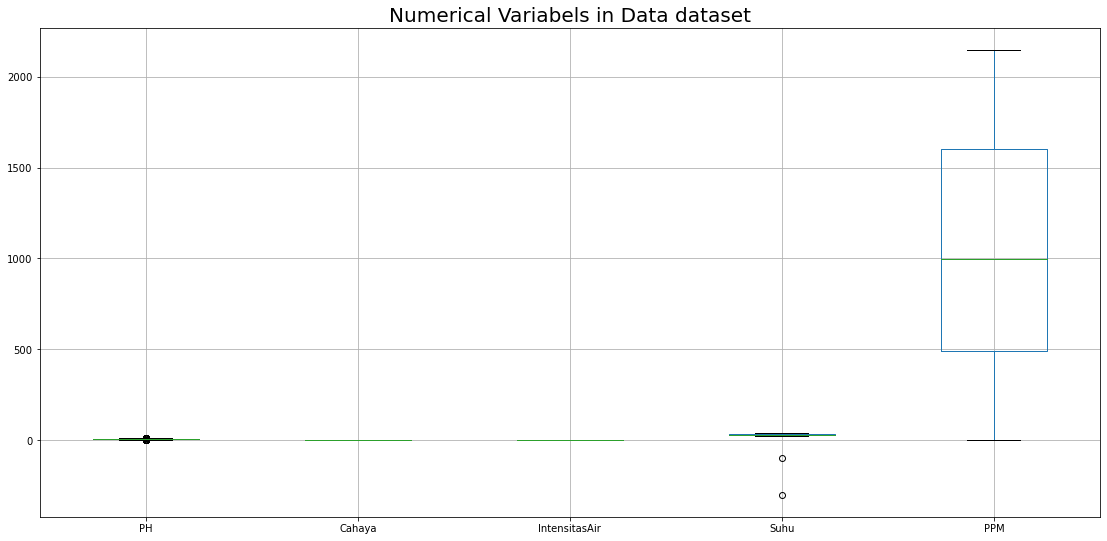

In [149]:
num_cols = ['PH', 'Cahaya', 'IntensitasAir', 'Suhu', 'PPM'] 
plt.figure(figsize=(19,9)) 
data[num_cols].boxplot() 
plt.title("Numerical Variabels in Data dataset", fontsize=20) 
plt.show() 

## 5. Pisahkan data feature dengan label

In [150]:
X = data.iloc[:,:5].values 
X 

array([[6.500e+00, 1.000e+00, 1.000e+00, 2.700e+01, 1.880e+02],
       [5.700e+00, 1.000e+00, 1.000e+00, 2.690e+01, 7.900e+01],
       [6.000e+00, 1.000e+00, 1.000e+00, 2.700e+01, 1.100e+01],
       ...,
       [3.200e+00, 1.000e+00, 2.000e+00, 2.530e+01, 7.930e+02],
       [1.400e+00, 1.000e+00, 2.000e+00, 2.540e+01, 1.052e+03],
       [5.000e+00, 1.000e+00, 2.000e+00, 2.530e+01, 9.770e+02]])

In [151]:
Y = data.iloc[:, 2].values 
Y 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

## 6. Check Imbalanced Dataset, jika imbalanced, gunakan smote

In [152]:
counter = Counter(Y) 
print(counter) 

Counter({3: 308, 1: 154, 2: 154})


In [153]:
from imblearn.over_sampling import SMOTE 
oversample = SMOTE(k_neighbors=5) 
X_smote, Y_smote = oversample.fit_resample(X, Y) 

In [154]:
counter = Counter(Y_smote) 
print(counter) 

Counter({1: 308, 3: 308, 2: 308})


## 7. Visualisasikan Data sehingga kita bisa mengetahui sebuah informasi

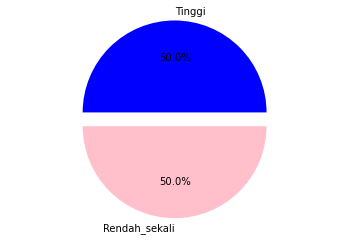

In [155]:
import matplotlib.pyplot as plt 
from matplotlib import style

Tinggi = (data['IntensitasAir'] == 1).sum() 
Rendah_sekali = (data['IntensitasAir'] == 2).sum() 
p = [Tinggi, Rendah_sekali] 
plt.pie(p, 
         autopct='%1.1f%%', 
        labels = ['Tinggi', 'Rendah_sekali'],
        colors = ['blue', 'pink'],
        explode = (0.15, 0), 
        startangle = 0) 
plt.axis('equal') 
plt.show() 

## 8. Lakukan Normalization menggunakan MinMaxScaler atau Standardization menggunakan StandarScaler

# Normalization

In [156]:
from sklearn.preprocessing import MinMaxScaler 

scaler =  MinMaxScaler()
# transform data
X_scaled = scaler.fit_transform(X)
print(X_scaled) 

[[0.46428571 1.         0.         0.96007046 0.08705773]
 [0.40714286 1.         0.         0.95977686 0.03631285]
 [0.42857143 1.         0.         0.96007046 0.00465549]
 ...
 [0.22857143 1.         0.5        0.95507927 0.36871508]
 [0.1        1.         0.5        0.95537287 0.48929236]
 [0.35714286 1.         0.5        0.95507927 0.45437616]]


# Standardization

In [157]:
from sklearn.preprocessing import StandardScaler 

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y) 

In [159]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [160]:
X_train

array([[ 2.68122077e-02,  1.02100007e+00, -2.85570634e-01,
        -1.90247920e-01, -2.66525017e-01],
       [-1.75108605e+00,  1.02100007e+00, -1.48643176e+00,
        -4.52585617e-02, -1.06990299e+00],
       [ 2.21499468e+00,  2.10855948e-02, -1.48643176e+00,
         8.74416007e-04, -1.45889034e+00],
       ...,
       [-3.49281655e-01, -1.02743583e+00,  9.15290494e-01,
        -2.17145773e+01,  1.56092171e+00],
       [-2.46710601e-01, -1.02743583e+00,  9.15290494e-01,
         2.44720156e-01,  1.74668302e+00],
       [ 1.29383261e-01,  1.02100007e+00,  9.15290494e-01,
         8.74416007e-04, -7.31722142e-01]])

## 9. Buat model ANN

In [161]:
model = Sequential() 
model.add(Dense(X.shape[1], activation='relu', input_dim = X.shape[1])) 
model.add(Dense(128, activation='relu')) 
model.add(Dense(1, activation = 'sigmoid')) 

In [162]:
X.shape[1] 

5

In [163]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])   

In [164]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
16/16 [==============================] - 0s 6ms/step - loss: 0.3125 - accuracy: 0.0650
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: -0.4056 - accuracy: 0.0630
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: -1.2430 - accuracy: 0.0630
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: -2.3579 - accuracy: 0.0630
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: -3.7903 - accuracy: 0.0630


In [166]:
model.evaluate(X_test, y_test) 

4/4 [==============================] - 0s 6ms/step - loss: -4.6750 - accuracy: 0.0645


[-4.675013065338135, 0.06451612710952759]

## 10. Build Model KNN

In [167]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as numpy 
from sklearn import preprocessing 
%matplotlib inline

In [168]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 42)

In [169]:
from sklearn.neighbors import KNeighborsClassifier 
k = 3 
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train) 
knn 

KNeighborsClassifier(n_neighbors=3)

In [170]:
from sklearn import metrics 

y_predict = knn.predict(X_test) 
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, y_predict)) 

Test set Accuracy:  1.0


In [171]:
Ks = 10
mean_acc = np.zeros((Ks))

for n in range(1,Ks+1): 
    
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train) 
    y_predict=neigh.predict(X_test) 
    mean_acc[n-1] = metrics.accuracy_score(Y_test, y_predict) 

mean_acc 

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

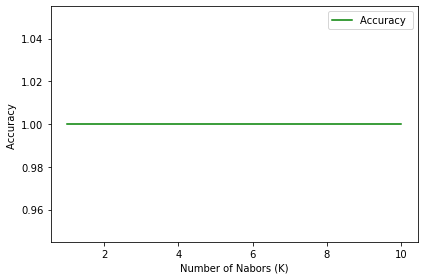

In [172]:
plt.plot(range(1,Ks+1),mean_acc,'g') 
plt.legend(('Accuracy ', '+/- 3xstd')) 
plt.ylabel('Accuracy ') 
plt.xlabel('Number of Nabors (K)') 
plt.tight_layout() 
plt.show() 

In [173]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 1.0 with k= 1
